# Prostate Cancer

Paul Hendricks
2017-06-25

## Overview

In this vignette, we demonstrate the power of easyml using a Prostate Cancer dataset.

## Load the data

First we load the easymlpy package and the Prostate Cancer dataset.


In [1]:
from easymlpy.datasets import load_prostate
from easymlpy import support_vector_machine

%matplotlib inline

/Users/paulhendricks/miniconda3/envs/easyml/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
prostate = load_prostate()
print(prostate.head())

     lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45      lpsa
0 -0.579818  2.769459   50 -1.386294    0 -1.386294        6      0 -0.430783
1 -0.994252  3.319626   58 -1.386294    0 -1.386294        6      0 -0.162519
2 -0.510826  2.691243   74 -1.386294    0 -1.386294        7     20 -0.162519
3 -1.203973  3.282789   58 -1.386294    0 -1.386294        6      0 -0.162519
4  0.751416  3.432373   62 -1.386294    0 -1.386294        6      0  0.371564


## Train a supprt vector machine model

To run an `easy_support_vector_machine` model, we pass in the following parameters:

* the data set `prostate`,
* the name of the dependent variable e.g. `lpsa`,
* whether to run a gaussian or a binomial model,
* which variables to exclude from the analysis,
* which variables are categorical variables; these variables are not scaled, if `preprocess_scale` is used,
* the random state,
* whether to display a progress bar,
* how many cores to run the analysis on in parallel.

In [3]:
# Analyze data
results = support_vector_machine.easy_support_vector_machine(prostate, 'lpsa',
                                                             n_samples=10, n_divisions=10, 
                                                             n_iterations=10, progress_bar=False, 
                                                             random_state=12345, n_core=1)

Generating predictions for a single train test split:
Generating measures of model performance over multiple train test splits:


## Assess results

Now let’s assess the results of the `easy_support_vector_machine` model.

### Predictions: ROC Curve

We can examine both the in-sample and out-of-sample ROC curve plots for one particular trian-test split determined by the random state and determine the Area Under the Curve (AUC) as a goodness of fit metric. Here, we see that the in-sample AUC is higher than the out-of-sample AUC, but that both metrics indicate the model fits relatively well.

/Users/paulhendricks/miniconda3/envs/easyml/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


(<matplotlib.figure.Figure at 0x10bfbab70>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10c586ac8>)

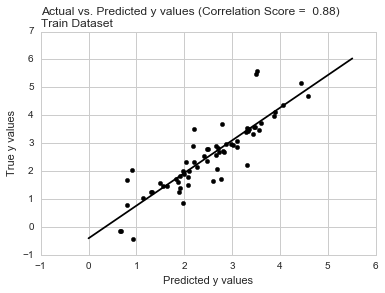

In [4]:
results.plot_predictions_single_train_test_split_train()

(<matplotlib.figure.Figure at 0x10832e7b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10f0e8198>)

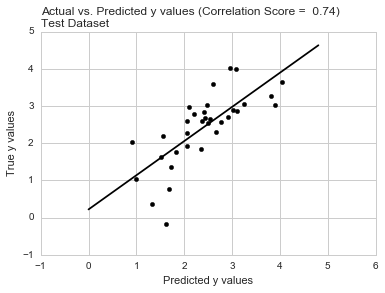

In [5]:
results.plot_predictions_single_train_test_split_test()

### Metrics: AUC

We can examine both the in-sample and out-of-sample AUC metrics for `n_divisions` train-test splits (ususally defaults to 1,000). Again, we see that the in-sample AUC is higher than the out-of-sample AUC, but that both metrics indicate the model fits relatively well.

(<matplotlib.figure.Figure at 0x10f1a2cf8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10f226438>)

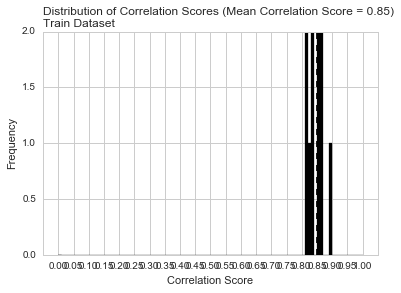

In [6]:
results.plot_model_performance_train()

(<matplotlib.figure.Figure at 0x10f4fae10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10f4eeba8>)

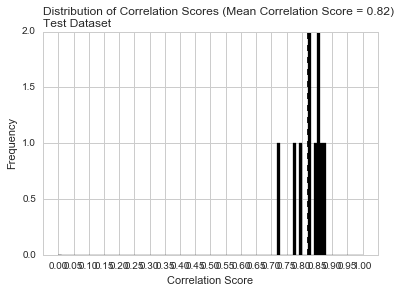

In [7]:
results.plot_model_performance_test()

## Discuss

In this vignette we used `easyml` to easily build and evaluate a support vector machine model using a Prostate Cancer dataset. 